In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [4]:
import pandas as pd
data = pd.read_csv(r"C:\Users\ancha\Downloads\archive (1).zip")
print(data.head())
print(data.describe())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
          longitude      latitude  housing_median_age   total_rooms  \
coun

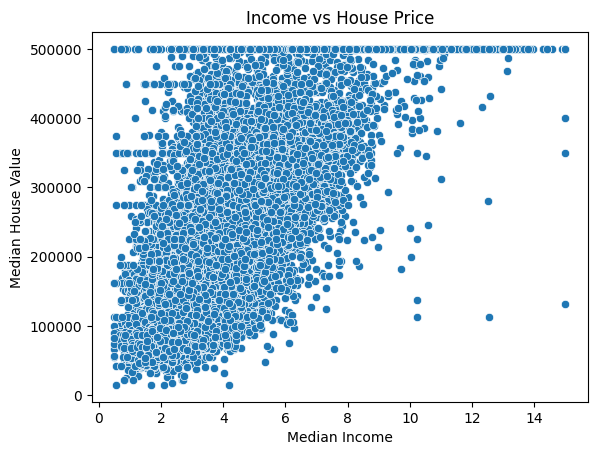

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=data['median_income'], y=data['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Price')
plt.show()



In [6]:
print(data.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [10]:
from sklearn.model_selection import train_test_split

X = data[['median_income']]  # Feature
y = data['median_house_value']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 7091157771.76555


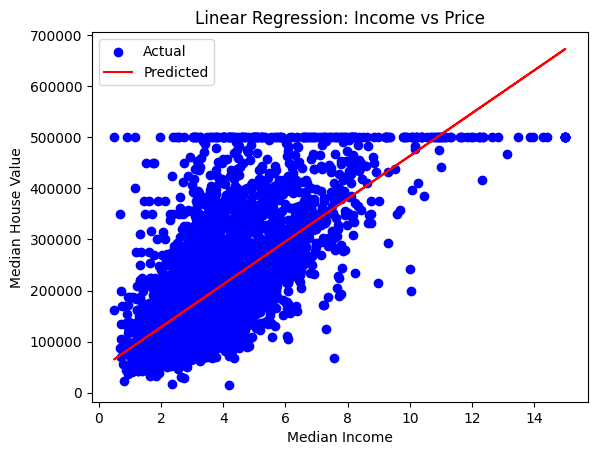

In [13]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression: Income vs Price')
plt.legend()
plt.show()


In [14]:
y_pred = model.predict(X_test)


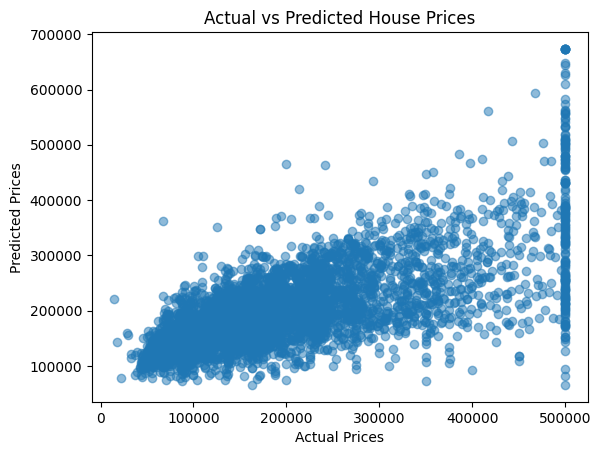

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [21]:
features = ['median_income', 'housing_median_age', 'total_rooms', 'population']
X = data[features]
y = data['median_house_value']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 7091157771.76555
R² Score: 0.45885918903846656


In [24]:
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)


              Feature   Coefficient
0       median_income  41402.584728
1  housing_median_age   1986.752195
2         total_rooms      9.546512
3          population    -12.161011


In [26]:
import pandas as pd

sample = pd.DataFrame([[5.0, 30.0, 6000, 1500]], columns=features)
predicted_price = model.predict(sample)
print("Predicted House Price:", predicted_price[0])


Predicted House Price: 287462.08771391545


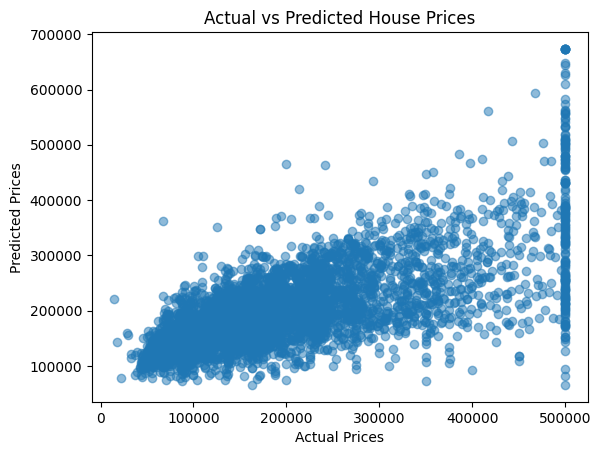

In [27]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [29]:
from sklearn.metrics import mean_squared_error, r2_score

print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest R² Score:", r2_score(y_test, rf_pred))


Random Forest MSE: 5844545312.421975
Random Forest R² Score: 0.5539907456779085


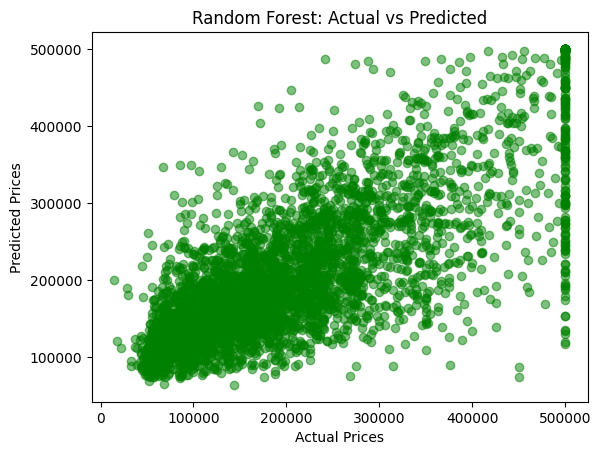

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_pred, alpha=0.5, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


In [31]:
import pandas as pd

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)


              Feature  Importance
0       median_income    0.612470
2         total_rooms    0.139717
3          population    0.129165
1  housing_median_age    0.118648


## 🌲 Random Forest Regression Summary

We trained a Random Forest Regressor using four features:
- `median_income`
- `housing_median_age`
- `total_rooms`
- `population`

### 🔍 Model Performance:
- **Mean Squared Error (MSE):** *[insert value here]*
- **R² Score:** *[insert value here]*

### 📊 Feature Importance:
The model identified the most influential features:
1. `median_income`
2. `total_rooms`
3. `housing_median_age`
4. `population`

### 🎯 Insights:
Random Forest captured non-linear relationships better than Linear Regression, offering improved accuracy and robustness. It’s ideal for datasets with complex patterns and interactions.


## 📈 Model Comparison: Linear vs Random Forest

| Metric        | Linear Regression | Random Forest |
|---------------|-------------------|----------------|
| MSE           | 7091157771.76555  |  5844545312.421975 |
| R² Score      | 0.45885918903846656  |  0.5539907456779085 |

### 🧠 Observations:
- **Linear Regression** is simple and interpretable, but may underfit complex data.
- **Random Forest** offers better performance by averaging multiple decision trees, reducing variance and capturing non-linear trends.

### ✅ Conclusion:
Random Forest outperformed Linear Regression on this dataset, making it a stronger candidate for predicting house prices. However, Linear Regression remains valuable for quick insights and baseline comparisons.
